In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_raw.csv')
dataset.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


#### Data Cleaning

In [11]:
region1 = dataset.columns.str.strip().to_list()[0]
region1

'Bejaia Region Dataset'

In [12]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [14]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Label Regions: Bejaia Region '0' , Sidi-Bel Abbes Region '1'

In [15]:
dataset.loc[:121,'Region'] = 0
dataset.loc[122:, 'Region'] = 1

In [17]:
dataset['Region']=dataset['Region'].astype(int)

In [20]:
dataset.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [21]:
dataset = dataset.drop(index=[122,123], axis=0).reset_index(drop=True)

In [22]:
dataset.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [24]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [25]:
dataset.columns = [col.strip() for col in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
dataset['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [27]:
dataset['Classes'] = dataset['Classes'].str.strip()
dataset['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [28]:
dataset['Classes'].mode()[0]

'fire'

In [29]:
dataset['Classes'] = dataset['Classes'].fillna(dataset['Classes'].mode()[0])
dataset['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [30]:
dataset['Classes'] = dataset['Classes'].map({'not fire':0, 'fire':1})
dataset['Classes'].unique()

array([0, 1])

In [31]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [32]:
dataset = dataset.drop(columns=['day', 'month', 'year'], axis=1)
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [33]:
object = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']
object

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [34]:
for i in object:
    dataset[i] = dataset[i].astype(float)
    
dataset.info()

ValueError: could not convert string to float: '14.6 9'

In [35]:
for i in object:
    result = dataset[dataset[i] == '14.6 9']
    if result.empty == False:
        print(result, f'columna: {i}')

     Temperature    RH    Ws  Rain  FFMC   DMC      DC   ISI   BUI      FWI  \
165         37.0  37.0  18.0   0.2  88.9  12.9  14.6 9  12.5  10.4  fire      

     Classes  Region  
165        1       1   columna: DC


In [36]:
dataset = dataset.drop(index=165, axis=0).reset_index(drop=True)

In [37]:
for i in object:
    dataset[i] = dataset[i].astype(float)
    
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


In [38]:
dataset.to_csv('Algerian_forest_fires_own_data_cleaned.csv', index=False)

#### EDA

In [39]:
df = dataset.copy()
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


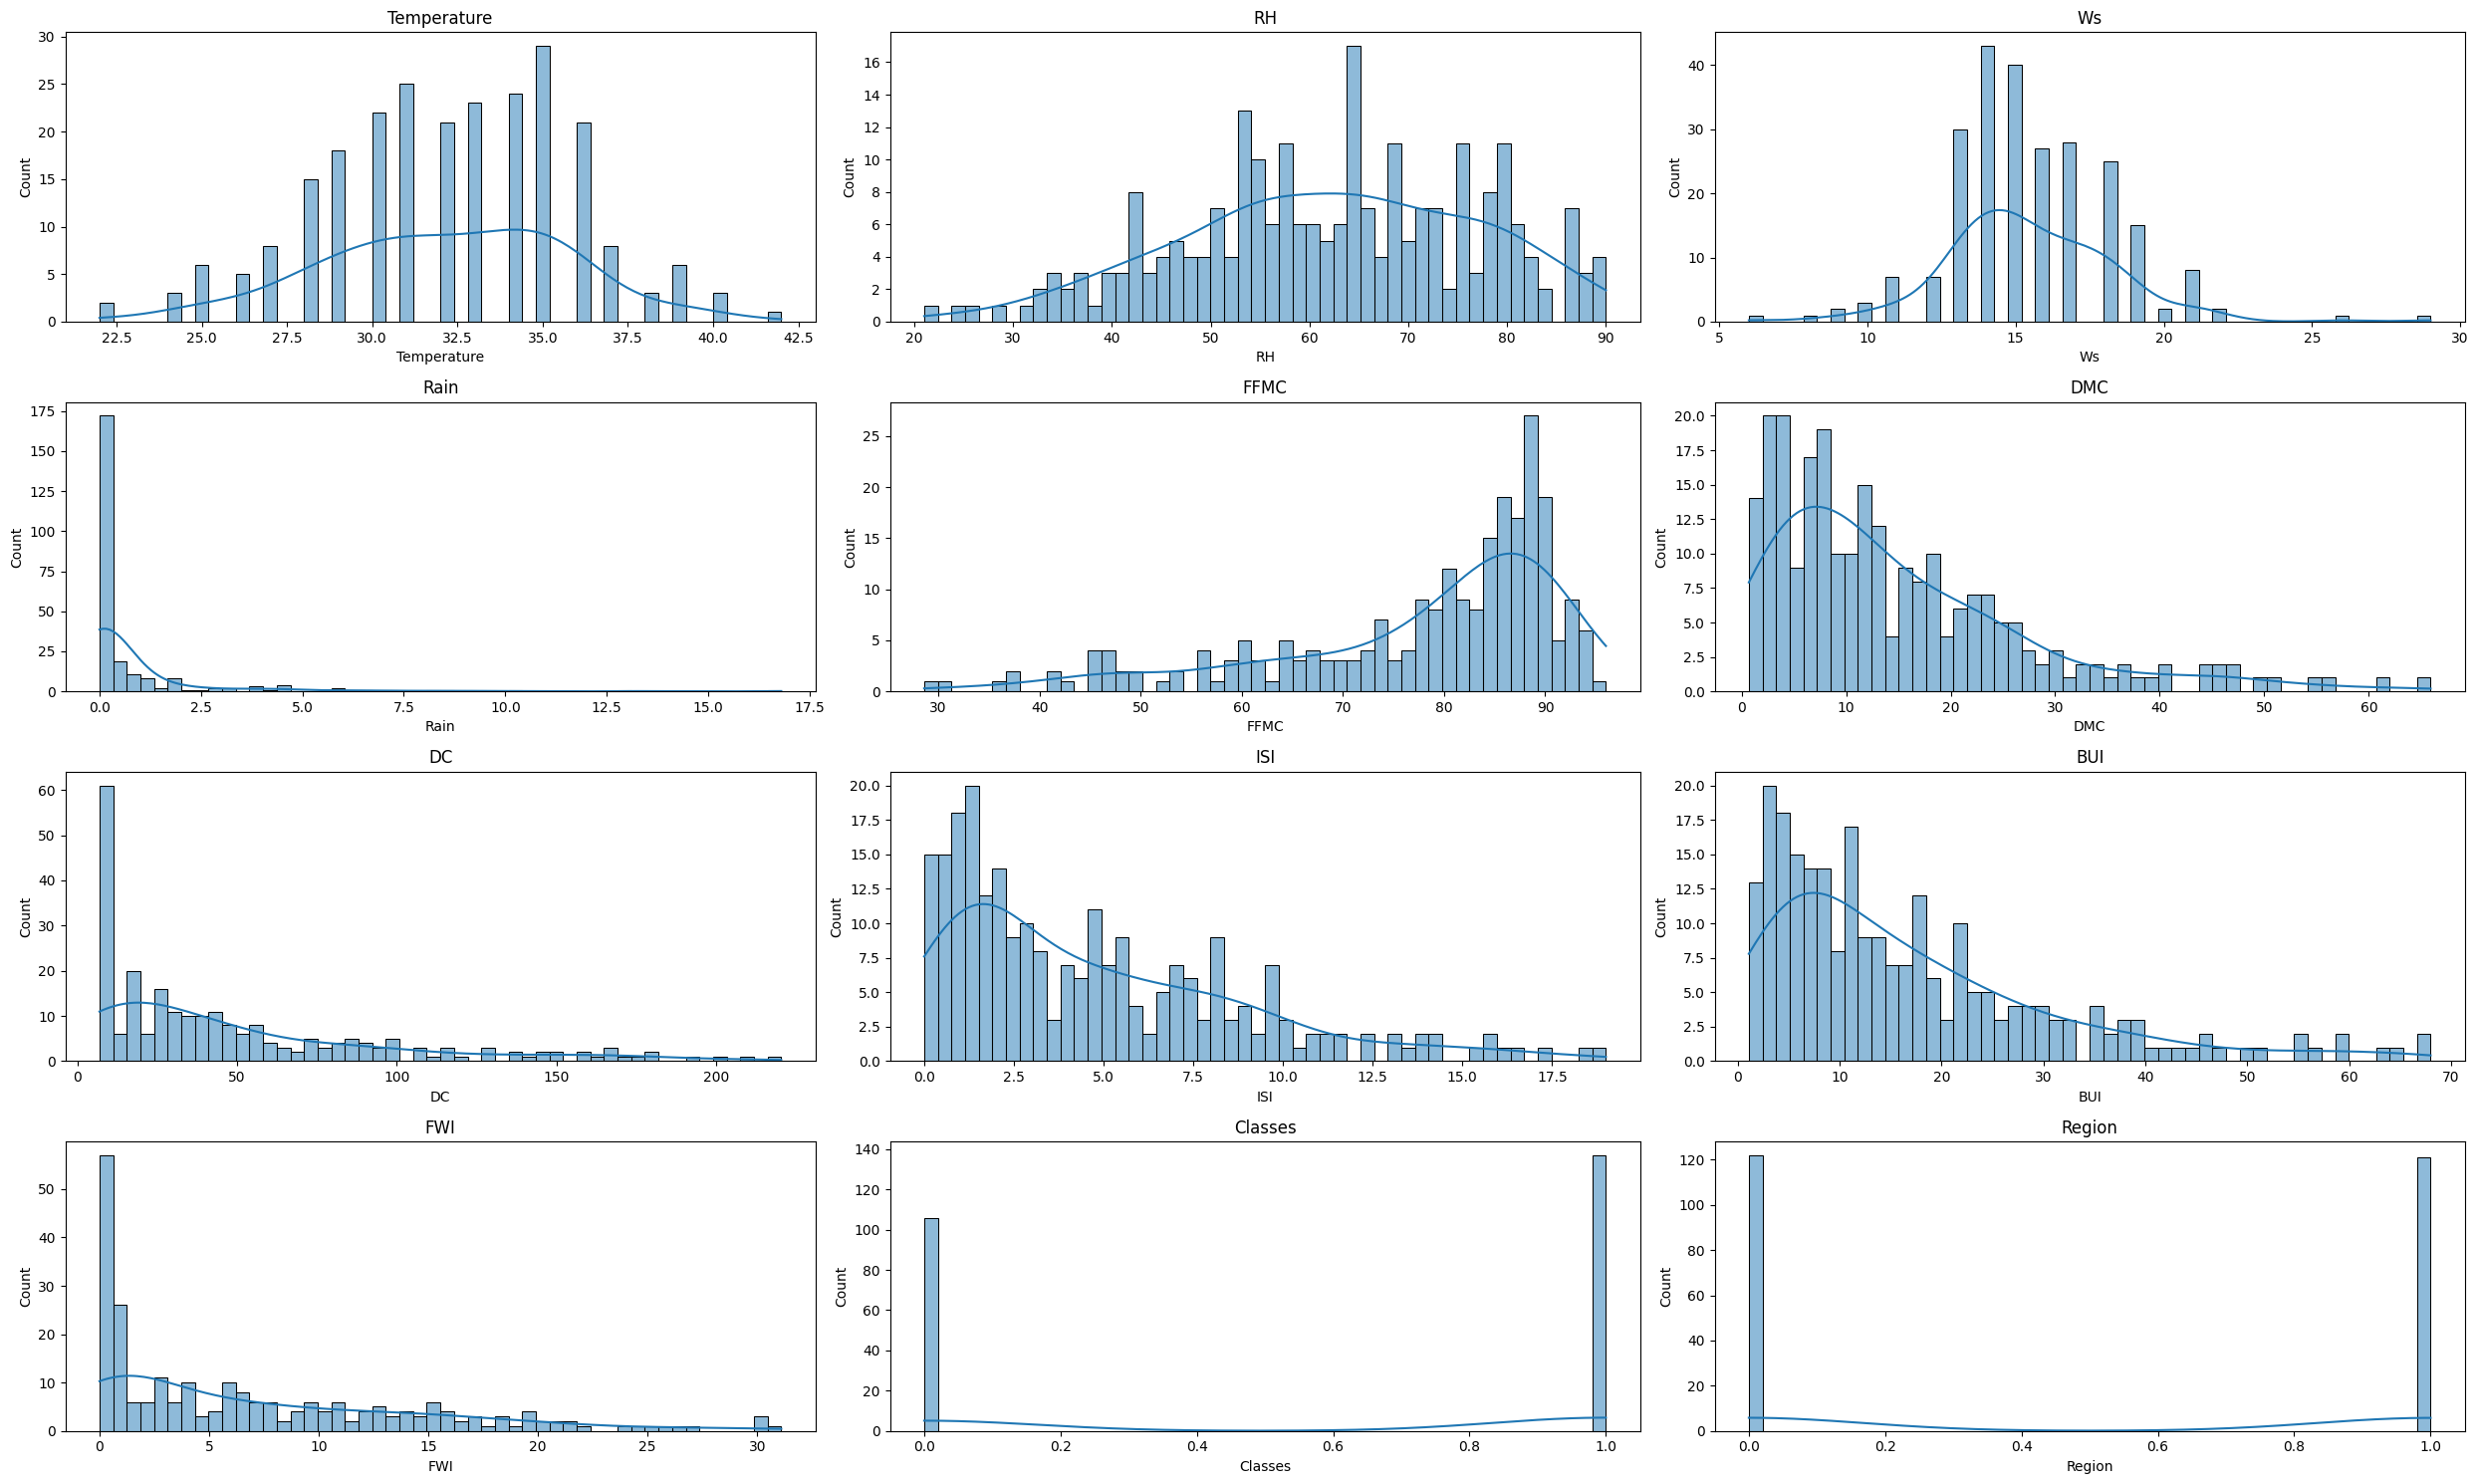

In [42]:
plt.figure(figsize=(25, 15))
for i,col in enumerate(df.columns):
    plt.subplot(4,3, i+1)
    sns.histplot(x=df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [43]:
percentages = df['Classes'].value_counts(normalize=True)*100
percentages

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

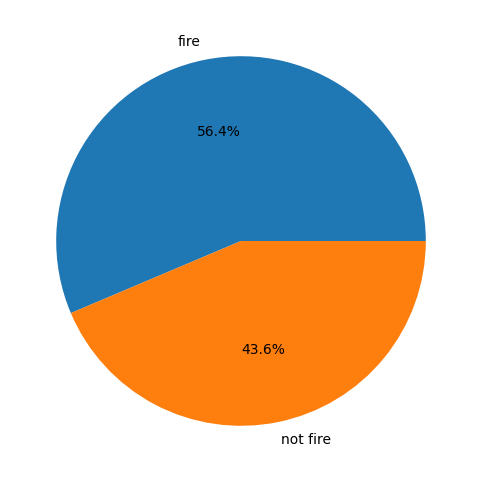

In [44]:
plt.figure(figsize=(10,6))
plt.pie(x=percentages, labels=['fire','not fire'], autopct='%1.1f%%')
plt.show()

In [45]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


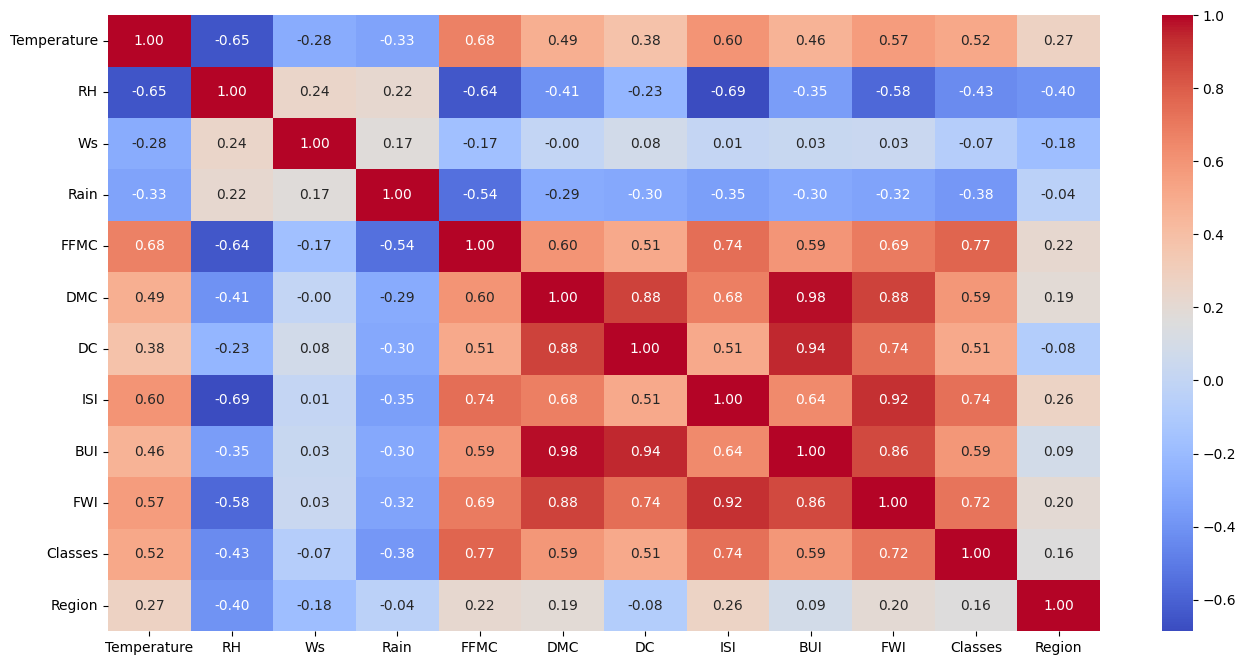

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, fmt='1.2f', cmap='coolwarm')
plt.show()

In [47]:
matrix_corr = df.corr()
matrix_corr['FWI'].sort_values(ascending=False)

FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
Classes        0.719216
FFMC           0.691132
Temperature    0.566670
Region         0.197102
Ws             0.032368
Rain          -0.324422
RH            -0.580957
Name: FWI, dtype: float64